# Learning the Linear Model

Our goal is to learn the following linear model:
\begin{gather}
X_{n+1} = T X_{n} + D
\end{gather}

When:
\begin{gather}
T =
 \begin{bmatrix} 
    A_{1} & B_{1} & C_{1} \\
    A_{2} & B_{2} & C_{2} \\
    A_{3} & B_{3} & C_{3} 
    \end{bmatrix} , 
     D =
 \begin{bmatrix} 
    D_{1}\\
    D_{2}\\
    D_{3} 
    \end{bmatrix} , 
       X_{n} =
 \begin{bmatrix} 
    HR_{n}\\
    BP_{n}\\
    RR_{n} 
    \end{bmatrix}
\end{gather}

# Training
With given 3 signals, blood pressure heart rate and respiration rate, from second 0 to n, lets assume the following equations:

\begin{gather}
 \begin{bmatrix} HR_{1} \\ \vdots \\ HR_{n} \end{bmatrix}=
 \begin{bmatrix} 
    HR_{0} & BP_{0} & RR_{0} \\
    \vdots & \vdots & \vdots \\
    HR_{n-1} & BP_{n-1} & RR_{n-1} 
    \end{bmatrix}
  \begin{bmatrix}
   A_{1}   \\
   B_{1}  \\
   C_{1} 
   \end{bmatrix} +
   \begin{bmatrix} D_{1} \\ \vdots \\ D_{1} \end{bmatrix}
\end{gather}

\begin{gather}
 \begin{bmatrix} BP_{1} \\ \vdots \\ BP_{n} \end{bmatrix}=
 \begin{bmatrix} 
    HR_{0} & BP_{0} & RR_{0} \\
    \vdots & \vdots & \vdots \\
    HR_{n-1} & BP_{n-1} & RR_{n-1} 
    \end{bmatrix}
  \begin{bmatrix}
   A_{2}   \\
   B_{2}  \\
   C_{2} 
   \end{bmatrix} +
   \begin{bmatrix} D_{2} \\ \vdots \\ D_{2} \end{bmatrix}
\end{gather}

\begin{gather}
 \begin{bmatrix} RR_{1} \\ \vdots \\ RR_{n} \end{bmatrix}=
 \begin{bmatrix} 
    HR_{0} & BP_{0} & RR_{0} \\
    \vdots & \vdots & \vdots \\
    HR_{n-1} & BP_{n-1} & RR_{n-1} 
    \end{bmatrix}
  \begin{bmatrix}
   A_{3}   \\
   B_{3}  \\
   C_{3} 
   \end{bmatrix} +
   \begin{bmatrix} D_{3} \\ \vdots \\ D_{3} \end{bmatrix}
\end{gather}

Each one of the equations above describing a linear model, accordingly we will try to regress the following for i= {1,2,3}:
\begin{gather}
  \begin{bmatrix}
   A_{i}   \\
   B_{i}  \\
   C_{i} 
   \end{bmatrix} , D_{i}
\end{gather}

Methods for regression:
1. Least Squares (Manually while assuming D=0), for example:
\begin{gather}
    \overline{
    \begin{bmatrix}
        A_{1}\\B_{1}\\C_{1}
    \end{bmatrix}}= 
    \left(
        \begin{bmatrix}
            HR_{0}&BP_{0}&RR_{0}\\ \vdots&\vdots&\vdots\\ HR_{n-1} & BP_{n-1} & RR_{n-1}
        \end{bmatrix}^T
        \begin{bmatrix}
            HR_{0}&BP_{0}&RR_{0}\\ \vdots&\vdots&\vdots\\ HR_{n-1} & BP_{n-1} & RR_{n-1}
        \end{bmatrix}
    \right)^{-1}
    \begin{bmatrix}
        HR_{0}&BP_{0}&RR_{0}\\ \vdots&\vdots&\vdots\\ HR_{n-1} & BP_{n-1} & RR_{n-1}
    \end{bmatrix}^T
    \begin{bmatrix}
        HR_{1}\\ \vdots\\ HR_{n}
    \end{bmatrix}
\end{gather}

2. Least Squares (sklearn)

3. LassoCV (sklearn)

4. RidgeCV (sklearn)

manual page for the methods form sklearn library:
https://scikit-learn.org/stable/modules/linear_model.html

In [1]:
def find_T(start_train_point, end_train_point, reg_method):
    
    %run blood-pressure.ipynb
    %run heart-rate.ipynb
    %run respiration.ipynb
    
    D = np.array([[0],[0],[0]])
    
    reg1=reg2=reg3=None
    
    time, bp_train = bp(start_train_point,end_train_point,0,0)
    time, hr_train = hr(start_train_point,end_train_point,0,0)
    time, rr_train = rr(start_train_point,end_train_point,0,0)

    # x is the 3 signals data from 0 to n-1
    x = np.column_stack((hr_train, bp_train, rr_train))
    x = np.delete(x, -1, axis=0)

    # y_i is the data from 1 to n for the i signal
    y_bp = np.delete(bp_train, 0)
    y_rr = np.delete(rr_train, 0)
    y_hr = np.delete(hr_train, 0)
    
    if reg_method == 1:
        hr_coef = np.dot(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(x.transpose(),y_hr))
        bp_coef = np.dot(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(x.transpose(),y_bp))
        rr_coef = np.dot(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(x.transpose(),y_rr))
    
    else:
        if reg_method == 2:
            reg1 = linear_model.LinearRegression(fit_intercept=True)
            reg2 = linear_model.LinearRegression(fit_intercept=True)
            reg3 = linear_model.LinearRegression(fit_intercept=True)
            
        if reg_method == 3:
            reg1 = linear_model.LassoCV(cv = 5, fit_intercept=True)
            reg2 = linear_model.LassoCV(cv = 5, fit_intercept=True)
            reg3 = linear_model.LassoCV(cv = 5, fit_intercept=True)

        if reg_method == 4:
            reg1 = linear_model.RidgeCV(fit_intercept=True)
            reg2 = linear_model.RidgeCV(fit_intercept=True)
            reg3 = linear_model.RidgeCV(fit_intercept=True)
        
        reg1.fit(x, y_hr)
        hr_coef = reg1.coef_
        hr_intercept = reg1.intercept_
        
        reg2.fit(x, y_bp)
        bp_coef = reg2.coef_
        bp_intercept = reg2.intercept_
        
        reg3.fit(x, y_rr)
        rr_coef = reg3.coef_
        rr_intercept = reg3.intercept_
        
        D = np.row_stack((hr_intercept, bp_intercept, rr_intercept))
        
    T = np.row_stack((hr_coef, bp_coef, rr_coef))
    
    Model = namedtuple('Model', ['T', 'D', 'reg1', 'reg2', 'reg3', 'start_train_point', 'end_train_point', 'reg_method'])
    model = Model(T, D, reg1, reg2, reg3, start_train_point, end_train_point, reg_method)
    
    return model

# Testing

Lets test the regressed matrix by caculating the following:
\begin{gather}
\overline{X}_{n+1} = \overline{T} X_{n} + \overline{D}
\end{gather}


In [2]:
def test_T(model, start_point, end_point):
    
    %run blood-pressure.ipynb
    %run heart-rate.ipynb
    %run respiration.ipynb

    time, bp_test = bp(start_point,end_point,0,0)
    time, hr_test = hr(start_point,end_point,0,0)
    time, rr_test = rr(start_point,end_point,0,0)
        
    data_test = np.row_stack((hr_test, bp_test, rr_test))
    
    data_pred = np.dot(model.T, data_test) + np.repeat(model.D, len(time), axis=1)
    
    '''
    if model.reg1 is not None:
        assert model.reg2 is not None and model.reg3 is not None
        x = np.column_stack((hr_test, bp_test, rr_test))
        hr_pred = model.reg1.predict(x)
        bp_pred = model.reg2.predict(x)
        rr_pred = model.reg3.predict(x)
        data_pred2 = np.row_stack((hr_pred, bp_pred, rr_pred))
        assert(data_pred.shape == data_pred2.shape)
        assert (np.absolute(data_pred - data_pred2) < 0.0000000001).all()
    '''
    
    time = np.delete(time, 0)
    data_test = np.delete(data_test, 0, axis=1)
    data_pred = np.delete(data_pred, -1, axis=1)
    
    time2, data_test2, data_pred2 = test_T2(model.T, model.D, start_point, end_point)
    
    '''
    assert time.shape == time2.shape
    assert data_test.shape == data_test2.shape
    assert (time == time2).all()
    assert (data_test == data_test2).all()
    '''
    
    Prediction = namedtuple('Prediction', ['time', 'data_test', 'data_pred', 'data_pred2', 'model'])
    prediction = Prediction(time, data_test, data_pred, data_pred2, model)
    
    return prediction

# Testing the matrix T in another way
Another way to test the matrix is by building one signal from the other two as follows:
\begin{gather}
    \overline {HR_{i}} = \overline {HR}_{i-1} \overline A_{1} + BP_{i-1} \overline B_{1} + RR_{i-1} \overline C_{1}
\end{gather}
\begin{gather}
    \overline {BP}_{i} = HR_{i-1} \overline A_{2} + \overline {BP}_{i-1} \overline B_{2} + RR_{i-1} \overline C_{2}
\end{gather}
\begin{gather}
    \overline {RR}_{i} = HR_{i-1} \overline A_{3} + BP_{i-1} \overline B_{3} + \overline {RR}_{i-1} \overline C_{3}
\end{gather}

In [3]:
def test_T2(T, D, start_point, end_point):
    %run blood-pressure.ipynb
    %run heart-rate.ipynb
    %run respiration.ipynb

    time, bp_test = bp(start_point,end_point,0,0)
    time, hr_test = hr(start_point,end_point,0,0)
    time, rr_test = rr(start_point,end_point,0,0)
    
    bp_reg = []
    bp_reg.append(bp_test[0])
    for (hr_sample, rr_sample, bp_sample) in zip(hr_test, rr_test, bp_reg):
        bp_reg.append(bp_sample*T[1][1] + hr_sample*T[1][0] + rr_sample*T[1][2] + D[1])

    hr_reg = []
    hr_reg.append(hr_test[0])
    for (hr_sample, rr_sample, bp_sample) in zip(hr_reg, rr_test, bp_test):
        hr_reg.append(bp_sample*T[0][1] + hr_sample*T[0][0] + rr_sample*T[0][2] + D[0])

    rr_reg = []
    rr_reg.append(rr_test[0])
    for (hr_sample, rr_sample, bp_sample) in zip(hr_test, rr_reg, bp_test):
        rr_reg.append(bp_sample*T[2][1] + hr_sample*T[2][0] + rr_sample*T[2][2] + D[2])
    
    data_test = np.row_stack((hr_test, bp_test, rr_test))
    data_pred = np.row_stack((hr_reg, bp_reg, rr_reg))
    
    time = np.delete(time, 0)
    data_test = np.delete(data_test, 0, axis=1)
    data_pred = np.delete(data_pred, -1, axis=1)
    data_pred = np.delete(data_pred, 0, axis=1)
    
    return time, data_test, data_pred

# White Noise testing

In [4]:
def white_noise(error, debug):
    '''
    plot_acf(error[0], lags=50)
    plot_acf(error[1], lags=50)
    plot_acf(error[2], lags=50)
    '''
    hr_wn = bp_wn = rr_wn = True
    for signal in [0,1,2]:
        h, pV, Q, cV = lbqtest(error[signal], range(1, min(20, len(error[signal]))), alpha=0.01)
        for i in range(len(h)):
                if h[i] == True:
                    if signal == 0:
                        hr_wn = False
                    if signal == 1:
                        bp_wn = False
                    if signal == 2:
                        rr_wn = False
        if debug == 1:
            print ('lag   p-value          Q    c-value   rejectH0')
            for i in range(len(h)):
                print ("%-2d %10.3f %10.3f %10.3f      %s" % (i+1, pV[i], Q[i], cV[i], str(h[i])))
    return hr_wn and bp_wn and rr_wn, hr_wn, bp_wn, rr_wn

In [18]:
def print_prediction_results(prediction):
    
    print("*****************************************************************************************************************")
    print("reg_method=", prediction.model.reg_method)
    print("T=\n", prediction.model.T)
    print("D=\n", prediction.model.D)
    print('Mean squared error: %.2f'
      % mean_squared_error(prediction.data_test, prediction.data_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
      % r2_score(prediction.data_test, prediction.data_pred))
    print(prediction.model.start_train_point, prediction.model.end_train_point)
    
    plt.figure(figsize=(18, 3))
    plt.plot(prediction.time, prediction.data_test[0])
    plt.plot(prediction.time, prediction.data_pred[0])
    plt.plot(prediction.time, prediction.data_pred2[0])
    plt.title('Heart Rate')
    plt.xlabel('Time [sec]')
    plt.legend(['data', 'regressed', 'regressed2'], loc='best')
    plt.show()
    
    plt.figure(figsize=(18, 3))
    plt.plot(prediction.time, prediction.data_test[1])
    plt.plot(prediction.time, prediction.data_pred[1])
    plt.plot(prediction.time, prediction.data_pred2[1])
    plt.title('Systolic Blood Pressure')
    plt.xlabel('Time [sec]')
    plt.legend(['data', 'regressed', 'regressed2'], loc='best')
    plt.show()

    plt.figure(figsize=(18, 3))
    plt.plot(prediction.time, prediction.data_test[2])
    plt.plot(prediction.time, prediction.data_pred[2])
    plt.plot(prediction.time, prediction.data_pred2[2])
    plt.title('Respiration Rate')
    plt.xlabel('Time [sec]')
    plt.legend(['data', 'regressed', 'regressed2'], loc='best')
    plt.show()
    
    print("*****************************************************************************************************************")

In [19]:
%run configuration.ipynb
models = []
def all_models(start, end):
    for start_ in np.arange(start, end + 100, 100):
        for end_ in np.arange(start_ + 100, end + 100, 100):
            for reg_method in [1,3]:
                print("-", end = " ")
                models.append(find_T(start_, end_, reg_method))
    return models

In [23]:
%run configuration.ipynb
def perfect_model(models, start, end):
    fit = False
    for end_ in np.arange(start + 100, end + 100, 100):
        print(" ")
        print(start, end_)
        pre_fit = fit
        fit = False
        for model_ in models:
            prediction = test_T(model_, start, end_)
            wn,_,_,_ = white_noise(prediction.data_pred-prediction.data_test,0)
            print(wn, end = " ")
            if wn == True:
                fit = True
                prediction_res = prediction
                end_res = end_
                break
        if (fit == False and pre_fit == True) or (fit == True and end_ == end):
            return prediction_res, end_res


In [21]:
models = all_models(300,1300)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [24]:
predictions = []
prediction, end = perfect_model(models,300,1300)
predictions.append(prediction)
while end != 1300:
    prediction, end = perfect_model(models,end,1300)
    predictions.append(prediction)

 
300 400
True  
300 500
True  
300 600
True  
300 700
True  
300 800
True  
300 900
False False False False False False False False False False False False False False False False False False False False False False True  
300 1000
False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  
900 1000
True  
900 1100
False False False False False False False False False False False False False Fa

*****************************************************************************************************************
reg_method= 1
T=
 [[ 0.40920035  0.29788192  1.66235214]
 [ 0.71363662  0.38885999 -0.53916865]
 [ 0.08359279  0.00903307  0.46757529]]
D=
 [[0]
 [0]
 [0]]
Mean squared error: 5.38
Coefficient of determination: 1.00
400 600


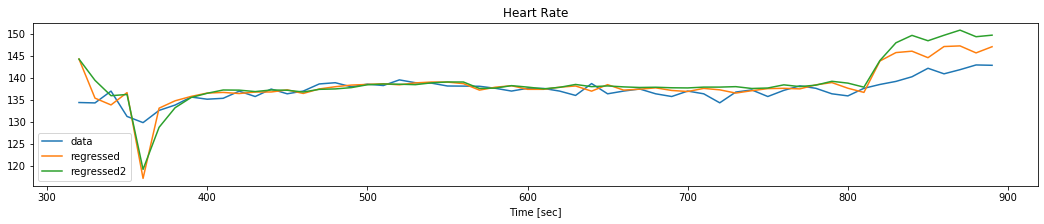

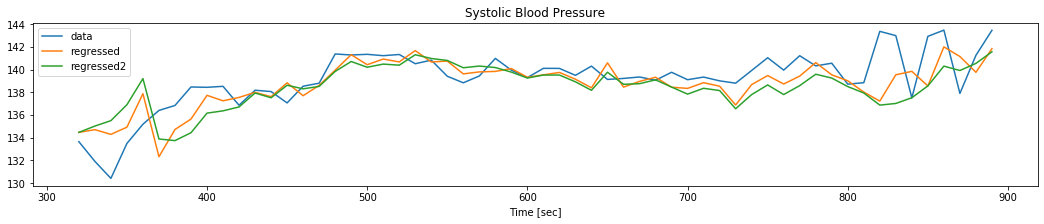

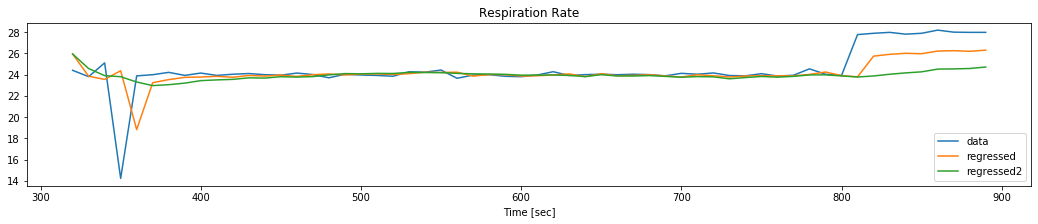

*****************************************************************************************************************
*****************************************************************************************************************
reg_method= 3
T=
 [[ 0.25302546 -0.10018843 -2.52246155]
 [ 1.88427372 -0.28781336 11.57488298]
 [-0.         -0.         -0.        ]]
D=
 [[ 191.19469239]
 [-410.80587637]
 [  27.9248699 ]]
Mean squared error: 2.15
Coefficient of determination: 1.00
900 1000


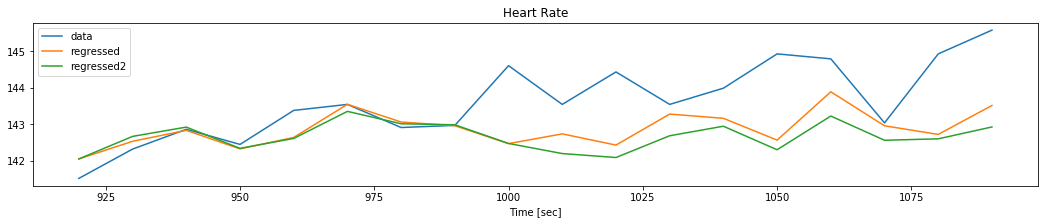

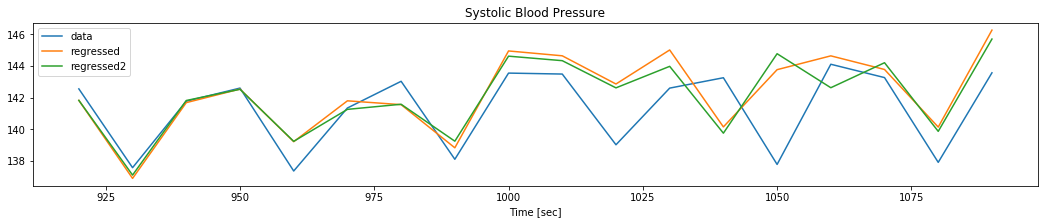

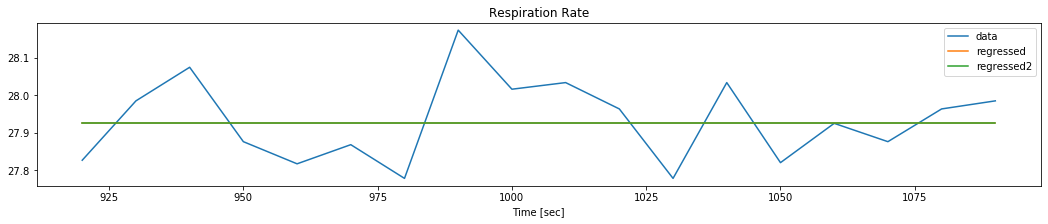

*****************************************************************************************************************
*****************************************************************************************************************
reg_method= 3
T=
 [[ 0.25302546 -0.10018843 -2.52246155]
 [ 1.88427372 -0.28781336 11.57488298]
 [-0.         -0.         -0.        ]]
D=
 [[ 191.19469239]
 [-410.80587637]
 [  27.9248699 ]]
Mean squared error: 13.37
Coefficient of determination: 1.00
900 1000


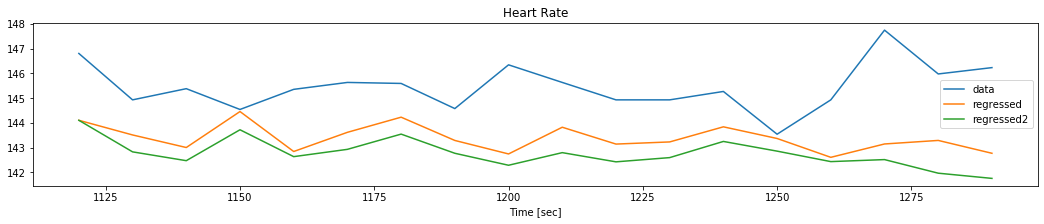

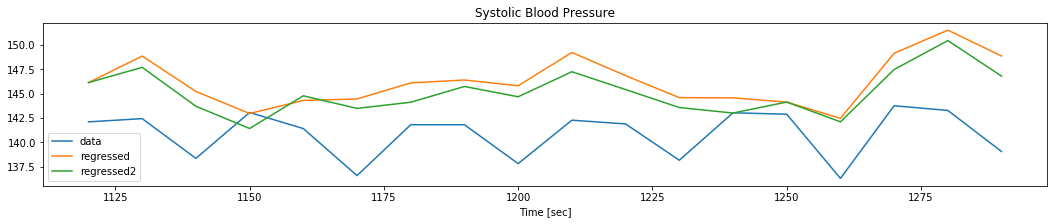

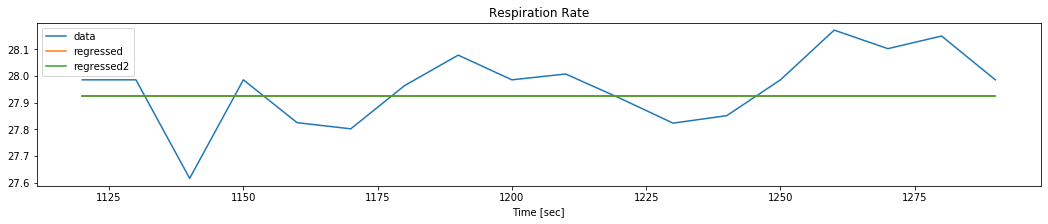

*****************************************************************************************************************


In [25]:
for i in range(len(predictions)):
    print_prediction_results(predictions[i])